## Time Series Forecasting - ARIMA Model

In [112]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


### Import necessary libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read data

In [114]:
df=pd.read_csv('/Users/selva/Documents/ML Project/input_price_data_5.csv',sep=';',names=['year','milk_price_euro'],skiprows=[0])
df['year'] = pd.to_datetime(df['year'])


In [115]:
df['milk_price_euro'] = df['milk_price_euro'].str.replace(',', '.')
df['milk_price_euro'] = df['milk_price_euro'].astype(float)
df.head(5)

,year,milk_price_euro
0,2018-09-01,33.19
1,2018-10-01,33.83
2,2018-11-01,35.43
3,2018-12-01,36.63
4,2019-01-01,37.16


<AxesSubplot:xlabel='year'>

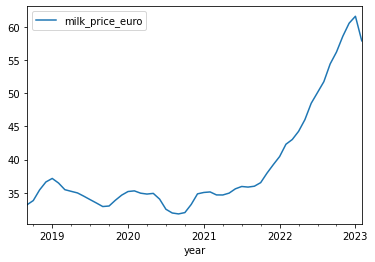

In [116]:
df.set_index('year', inplace=True)
df.plot()

### Check for Stationarity by Augmented Dicky-Fuller Test

In [89]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF : ',dftest[0])
    print('2. P-Value : ',dftest[1])
    print('3. Num of Lags : ',dftest[2])
    print('4. Num of Observations used for ADF Regression & Critical Values Cal: ',dftest[3])
    for key, val in dftest[4].items():
        print('\t',key,':',val)

In [90]:
ad_test(df['milk_price_euro'])

1. ADF :  -3.6228245444457423
2. P-Value :  0.005339368404784736
3. Num of Lags :  11
4. Num of Observations used for ADF Regression & Critical Values Cal:  42
	 1% : -3.596635636000432
	 5% : -2.933297331821618
	 10% : -2.6049909750566895


#### The p-value is less than 0.05 so the data is stationary and the next step is to create the time series model (ARIMA)

### Figure out the order of ARIMA Model

In [117]:
from pmdarima import auto_arima

#### By importing auto_arima, it calculates the different combination of p,d,q values and returns the best value with minimum AIC value.
Akaike Information Criterion (AIC) is a measure of the relative quality of a statistical model for a given set of data. AIC is used to compare different autoregressive models with different numbers of lags to determine which model is the best fit for the data.

In [118]:
stepwise_fit=auto_arima(df['milk_price_euro'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=138.815, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=139.620, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=139.513, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=141.501, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=140.368, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.185 seconds


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -68.408
Date:                Thu, 27 Apr 2023   AIC                            138.815
Time:                        13:32:39   BIC                            140.766
Sample:                    09-01-2018   HQIC                           139.563
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8132      0.060     13.639      0.000       0.696       0.930
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               349.02
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               5.82   Skew:                            -2.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
from statsmodels.tsa.arima.model import ARIMA

### Spliting the data into Train and Test dataset

In [120]:
train=df.iloc[:-12]
test=df.iloc[-12:]
print(train.shape, test.shape)

(42, 1) (12, 1)


### Train the Model

In [121]:
model=ARIMA(train['milk_price_euro'],order=(0,2,0))
model=model.fit()
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        milk_price_euro   No. Observations:                   42
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -34.953
Date:                Thu, 27 Apr 2023   AIC                             71.907
Time:                        13:32:48   BIC                             73.596
Sample:                    09-01-2018   HQIC                            72.518
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3361      0.082      4.084      0.000       0.175       0.497
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.22   Prob(JB):                         0.69
Heteroskedasticity (H):               0.51   Skew:                            -0.31
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Making predictions on Test dataset

In [122]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end,typ='levels')
print(pred)

2022-03-01    44.16
2022-04-01    46.01
2022-05-01    47.86
2022-06-01    49.71
2022-07-01    51.56
2022-08-01    53.41
2022-09-01    55.26
2022-10-01    57.11
2022-11-01    58.96
2022-12-01    60.81
2023-01-01    62.66
2023-02-01    64.51
Freq: MS, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='year'>

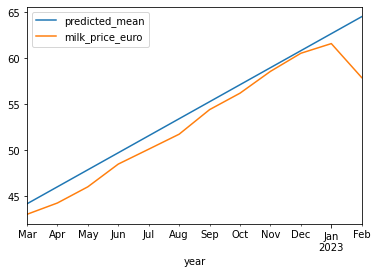

In [123]:
pred.plot(legend=True)
test['milk_price_euro'].plot(legend=True)

#### calculating the mean of test data inorder to compare it with the rmse value between predicted and test data.

In [124]:
test['milk_price_euro'].mean()

52.7275

In [125]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['milk_price_euro']))
print(rmse)

2.258950714232432


#### The rmse value is 2.2589 which is approximately 5% to the mean of the test data.The model performs pretty good.

In [109]:
model2=ARIMA(df['milk_price_euro'],order=(0,2,0))
model2=model2.fit()
df.tail()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,milk_price_euro
year,
2022-10-01,56.19
2022-11-01,58.56
2022-12-01,60.53
2023-01-01,61.58
2023-02-01,57.88


### For Predicting Future Dates

In [110]:
#index_future_dates=pd.date_range(start='2023-02-01',end='2023-06-01')
pred=model2.predict(start=len(df),end=len(df)+10,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
print(pred)

2023-03-01    54.18
2023-04-01    50.48
2023-05-01    46.78
2023-06-01    43.08
2023-07-01    39.38
2023-08-01    35.68
2023-09-01    31.98
2023-10-01    28.28
2023-11-01    24.58
2023-12-01    20.88
2024-01-01    17.18
Freq: MS, Name: ARIMA predictions, dtype: float64


<AxesSubplot:>

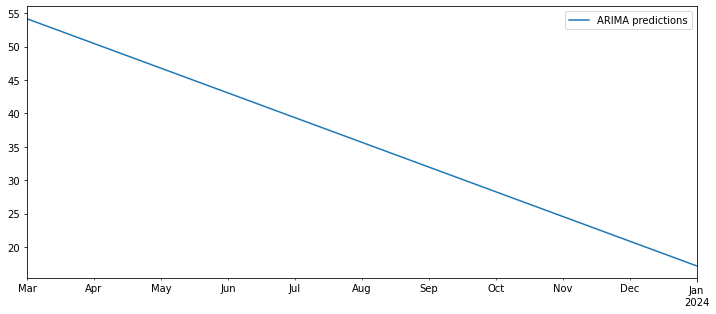

In [111]:
pred.plot(figsize=(12,5),legend=True)